In [17]:
import cv2
import cv2.aruco as aruco
from pdf2image import convert_from_path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [18]:
marker = convert_from_path('markers.pdf')
img = np.array(marker[0])
img = cv2.resize(img, None, fx=0.5, fy=0.5)

In [19]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)
parameters = aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
frame_markers = aruco.drawDetectedMarkers(img.copy(), corners, ids)

In [ ]:
rvec, tvec, markerPoints = aruco.estimatePoseSingleMarkers(corners[i], 0.02)

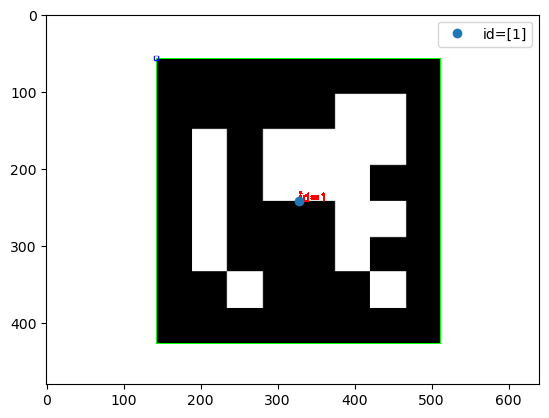

In [20]:
plt.figure()
plt.imshow(frame_markers)
for i in range(len(ids)):
    c = corners[i][0]
    plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "o", label = "id={0}".format(ids[i]))
plt.legend()
plt.show()